# 1. Connect to github classroom

Some of the assignments in this unit will be managed via GitHub classroom. Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/xqxsP3H1
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. Your assignment repository will include starter code that you can use for the exercises below. Clone your repository into a folder in your computer.

This practical has two kinds of exercises:

1. **Implement functions and upload the implementation to github classroom**. The exercises will have associated automated tests. To run these tests, please commit your changes and push the changes to your repository. This will initiate the automated tests, and you will receive the test results. There are no marks associated with these tests, but they will help you get used to the environment that you will use for the assignments.
2. **Analyse the data, train and evaluate image classifiers.** These exercises do not have automated tests but they will help you practice with the kinds of tasks that you will need to do in assignments 2 and 3.

# 1. Convolution

The following code uses OpenCV's filter2D to define a convolution filter. You can read a tutorial that demonstrates the use of OpenCV's filter2D here:
  - [Tutorial filter 2D](https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html)

In [1]:
import cv2
import numpy as np
def convolution_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)


Below is an example of use of this filter for the first training sample of the MNIST dataset.

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-03-02 15:00:55.222665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 15:00:56.317174: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/diego/anaconda3/envs/comp3420/lib/python3.9/site-packages/cv2/../../../../lib::/home/diego/anaconda3/lib/:/home/diego/anaconda3/lib/:/home/diego/anaconda3/envs/comp3420/lib/
2023-03-02 15:00:56.317337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object

In [3]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
result = convolution_filter(train_images[0], kernel)

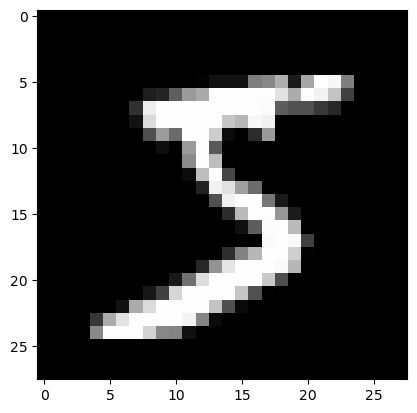

In [4]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0], cmap='gray')

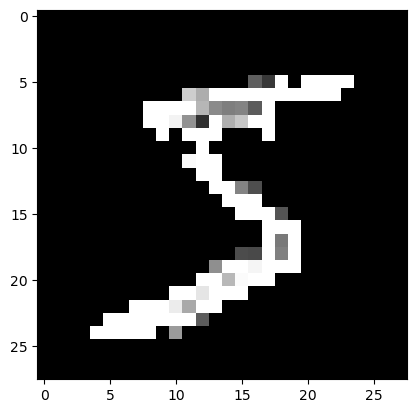

In [5]:
plt.imshow(result, cmap='gray')

Now it is your turn. Try several convolution kernels in the following images:
- [stickanimals.jpg](stickanimals.jpg) <img src="stickanimals.jpg" width="200" height="200">
- [stickanimalsGray.png](stickanimalsGray.png) <img src="stickanimalsGray.png" width="200" height="200">

Try, for example, these kernels:
- Edge detection: `np.array([[-1, -1, -1],
             [-1, 8, -1],
             [-1, -1, -1]])`
- Sharpen: `np.array([[0, -1, 0],
             [-1, 5, -1],
             [0, -1, 0]])`
- Blur: `np.array([[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]])`

# 2 Convolutions to classify digits

## 2.1 Implement the convolutions

Write a function `build_mnist_conv_model` that returns a Keras model that uses convolutions to classify the MNIST data. The resulting model must contain a sequence of convolution layers followed by MaxPooling. After this sequence of convolution + MaxPooling, the model must have a Flatten layer and the final classification layer. 

The function has the following parameters:
- `num_convolutions`: The number of convolution+MaxPooling.
- `num_filters`: A list that contains the number of filters in each convolution
- `kernel_sizes`: A list that contains the kernel size of each convolution layer.
- `pool_sizes`: A list that contains the pool sizes. If the value is 0, then there is no MaxPooling layer. 

An example of usage of this function is:

In [6]:
import week3
mnist_conv_model = week3.build_mnist_conv_model(3, [32,64,128], [3,3,3], [2,2,0])
mnist_conv_model.summary()

2023-03-02 15:03:58.217824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-02 15:03:58.230770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-02 15:03:58.231948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-02 15:03:58.233835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

With the help of this function, try different parameters and determine what is the optimal architecture. Feel free to use `keras-tuner` as we have seen in the lecture notebooks. Answer the following questions:

1. What are the optimal hyperparameters?
2. Does the model overfit? How can you determine whether it is overfitting?

## 2.2 Error Analysis

Write a function `count_classification_errors` that counts all kinds of classification errors and returns the counts. An example of use is:

In [7]:
import week3

targets = ['daisy','daisy','sunflower','tulip','daisy','sunflower']
predictions = ['daisy','sunflower','tulip','daisy','sunflower','tulip']
week3.count_classification_errors(targets, predictions)

{'daisy->sunflower': 2, 'sunflower->tulip': 2, 'tulip->daisy': 1}

With this function: 
1. Can you identify the most common errors of classification?
2. Explore examples that have classification errors. Can you identify the possible reason for the errors?

# (Optional) 3. Classify flowers

Adapt the code from above to implement a convolutional classifier for the Flowers data set:

 - [flower_photos.zip](https://drive.google.com/file/d/1pZNVfvi9iJRjS6fXFF3om7pp8Gp-AZtM/view?usp=share_link)

With that code, answer the following questions:

1. Is the convolutional network architecture that was optimal for the MNIST dataset, also optimal for the flowers dataset?
2. What are the most common errors of classification in the flowers dataset?
3. After examining the errors of classification, can you identify the possible reason for the errors?